### Importing the necessary libraries

In [ ]:
!unzip /content/drive/MyDrive/Dataset.zip

In [7]:
!pip install tensorflow_addons imblearn seaborn pydot

  Using cached tensorflow_addons-0.21.0-cp38-cp38-win_amd64.whl.metadata (1.9 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pydot-2.0.0-py3-none-any.whl.metadata (9.6 kB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached tensorflow_addons-0.21.0-cp38-cp38-win_amd64.whl (729 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pydot-2.0.0-py3-none-any.whl (22 kB)
Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


Importing Libraries

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from distutils.dir_util import copy_tree, remove_tree
from PIL import Image
from random import randint
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_addons as tfa
import seaborn as sns
import pydot
from sklearn.metrics import matthews_corrcoef
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D

c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Data Pre-Processing

In [3]:
base_dir = "/dataset/"
root_dir = "./"
test_dir = "/Dataset/Test/"
train_dir = "/Dataset/Train/"
work_dir = root_dir + "data/"

# if os.path.exists(work_dir):
#     remove_tree(work_dir)


os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

NameError: name 'os' is not defined

In [37]:
WORK_DIR = './dataset/dataset/Train'

CLASSES = [ 'Bhagavati',
            'Gulikan',
            'Muttapan',
            'Vishnumoorthi',
            'dance'
            ]

IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)

In [14]:
#Performing Image Augmentation to have more data samples

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=6500, shuffle=False)

Found 537 images belonging to 5 classes.


KeyboardInterrupt: 

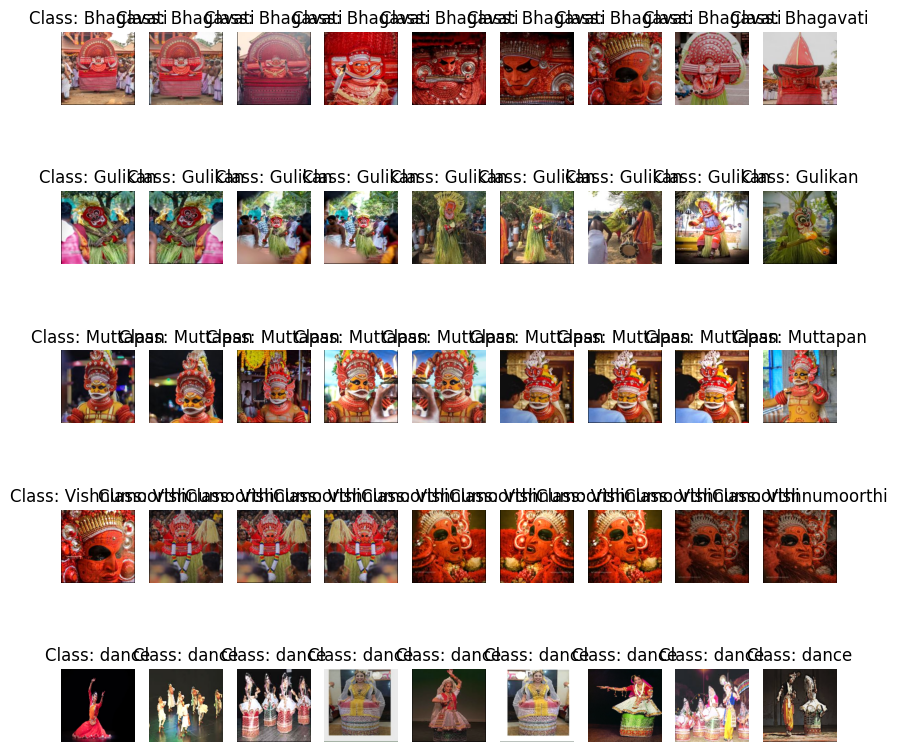

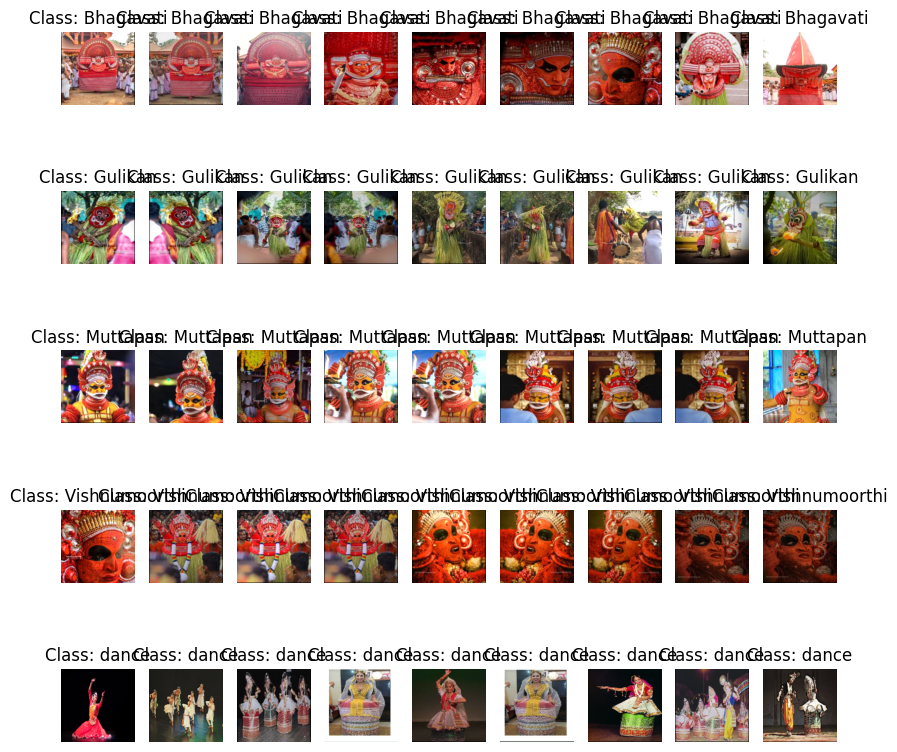

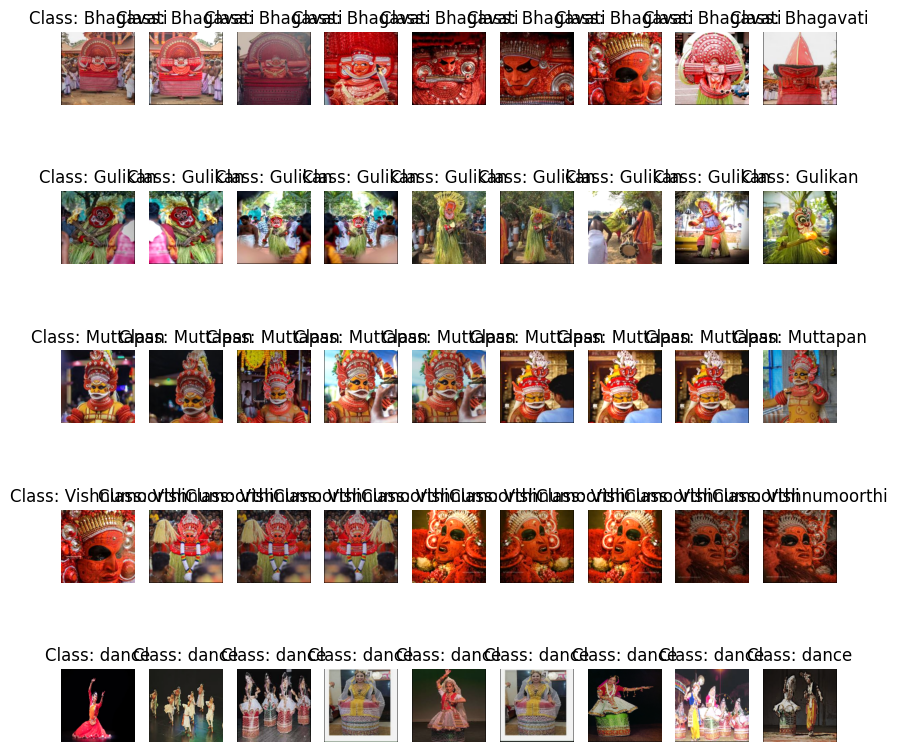

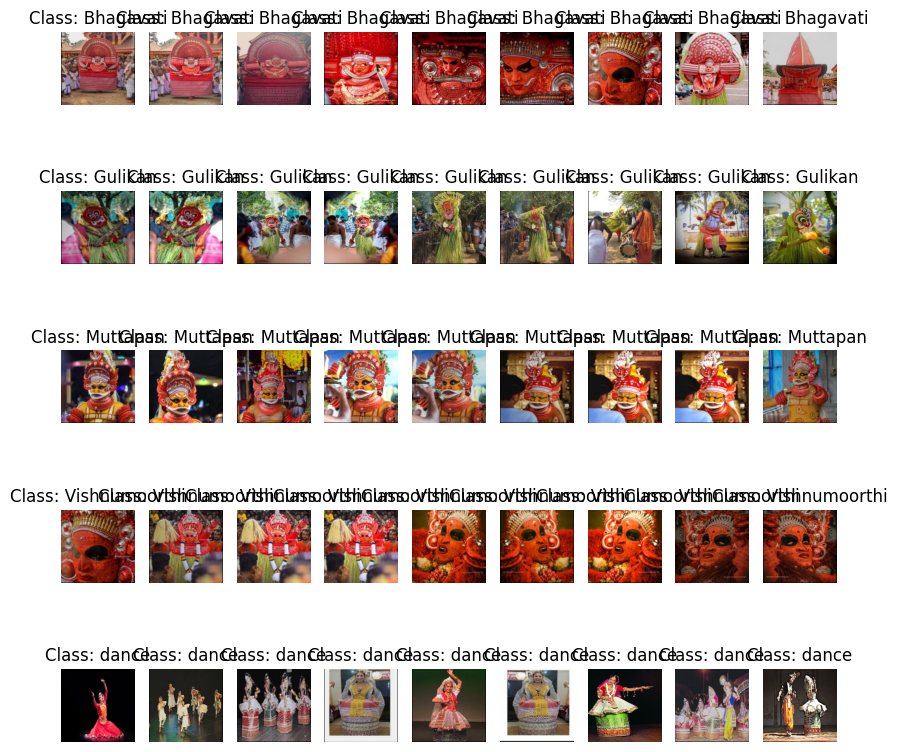

<Figure size 1000x1000 with 0 Axes>

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def show_images(generator, num_images_per_class=9):
    # get image labels
    labels = dict(zip(range(len(CLASSES)), CLASSES))

    # display a grid of images
    plt.figure(figsize=(10, 10))
    for class_idx in range(len(CLASSES)):
        # get a batch of images for the current class
        x, y = generator.next()

        # filter images for the current class
        class_indices = np.where(np.argmax(y, axis=1) == class_idx)[0]

        # display num_images_per_class images for the current class
        for i in range(min(num_images_per_class, len(class_indices))):
            ax = plt.subplot(len(CLASSES), num_images_per_class, class_idx * num_images_per_class + i + 1)
            plt.imshow(x[class_indices[i]])
            plt.axis("off")
            plt.title("Class: {}".format(labels[class_idx]))

num_classes_to_display = 5
for class_idx in range(num_classes_to_display):
    show_images(train_data_gen)


IndexError: index 3322 is out of bounds for axis 0 with size 537

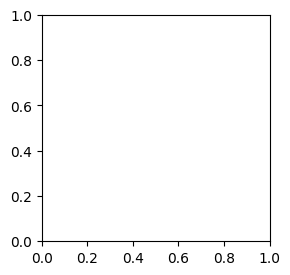

In [16]:
def show_images(generator,y_pred=None):
    # get image lables
    labels =dict(zip([0,1,2,3], CLASSES))

    # get a batch of images
    x,y = generator.next()

    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 6400)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))

    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))

# Display Train Images
show_images(train_data_gen)

In [39]:
data = {'Bagavathi': 0,
        'Gulikan': 0,
        'Muthappan': 0,
        'Vishnumoorthy': 0,
        'dance':0
        }
CLASSES = [ 'Bhagavati',
            'Gulikan',
            'Muttapan',
            'Vishnumoorthi',
            'dance'
            ]
cls = " ".join(CLASSES)
work_dir = "dataset\\dataset"
# visualizing dataset
for cls in os.listdir(work_dir):
    for img in os.listdir(work_dir+ '\\Train\\' + cls):
        data[cls] = data[cls] + 1

keys = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(keys, values, color=('lightgreen'), width = 0.4)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset\\dataset\\Train\\Test'

In [18]:
#Retrieving the data from the ImageDataGenerator iterator

train_data, train_labels = train_data_gen.next()

In [19]:
#Getting to know the dimensions of our dataset

print(train_data.shape, train_labels.shape)

(537, 176, 176, 3) (537, 5)


In [20]:
#Performing over-sampling of the data, since the classes are imbalanced

sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data.shape, train_labels.shape)

c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\ar646\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\ar646\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ar646\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 1307, in _ex

(1820, 176, 176, 3) (1820, 5)


In [21]:
#Splitting the data into train, test, and validation sets

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

### Constructing a Convolutional Neural Network Architecture

In [22]:
def conv_block(filters, act='relu'):
    """Defining a Convolutional NN block for a Sequential CNN model. """

    block = Sequential()
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(BatchNormalization())
    block.add(MaxPool2D())

    return block

In [23]:
def dense_block(units, dropout_rate, act='relu'):
    """Defining a Dense NN block for a Sequential CNN model. """

    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))

    return block

In [24]:
def construct_model(act='relu'):
    """Constructing a Sequential CNN architecture for performing the classification task. """

    model = Sequential([
        Input(shape=(*IMAGE_SIZE, 3)),
        Conv2D(16, 3, activation=act, padding='same'),
        Conv2D(16, 3, activation=act, padding='same'),
        MaxPool2D(),
        conv_block(32),
        conv_block(64),
        conv_block(128),
        Dropout(0.2),
        conv_block(256),
        Dropout(0.2),
        Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        Dense(4, activation='softmax')
    ], name = "cnn_model")

    return model

In [25]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True

my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
#Defining other parameters for our CNN model

model = construct_model()

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
           tfa.metrics.F1Score(num_classes=4)]

CALLBACKS = [my_callback]

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 176, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 16)        0         
 D)                                                              
                                                                 
 sequential (Sequential)     (None, 44, 44, 32)        14016     
                                                                 
 sequential_1 (Sequential)   (None, 22, 22, 64)        55680     
                                                                 
 sequential_2 (Sequential)   (None, 11, 11, 128)       221952    
                                                         

### Training & Testing the Model

In [27]:
#Fit the training data to the model and validate it using the validation data
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), callbacks=CALLBACKS, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\ar646\Desktop\Proj\Theyyam\.venv\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 4) are incompatible


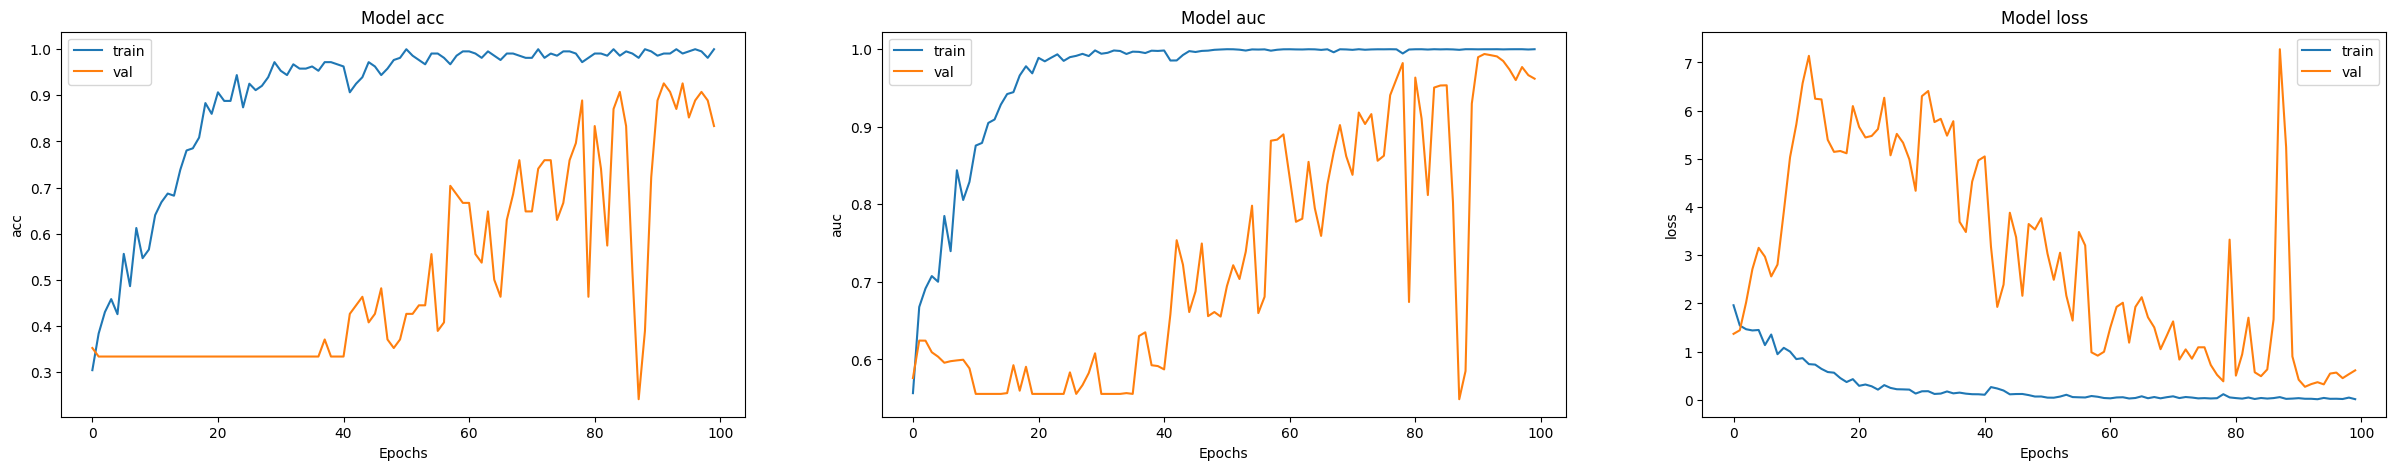

In [36]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [37]:
#Evaluating the model on the data

train_scores = model.evaluate(train_data, train_labels)
val_scores = model.evaluate(val_data, val_labels)
test_scores = model.evaluate(test_data, test_labels)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

3/3 [==============================] - 1s 152ms/step - loss: 0.6620 - acc: 0.8382 - auc: 0.9567 - f1_score: 0.8406
Training Accuracy: 98.60%
Validation Accuracy: 83.33%
Testing Accuracy: 83.82%


In [38]:
#Predicting the test data

pred_labels = model.predict(test_data)

3/3 [==============================] - 1s 165ms/step


In [39]:
#Print the classification report of the tested data

#Since the labels are softmax arrays, we need to roundoff to have it in the form of 0s and 1s,
#similar to the test_labels
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

               precision    recall  f1-score   support

    Bhagavati       1.00      0.55      0.71        20
     Muttapan       1.00      1.00      1.00        15
Vishnumoorthi       0.76      0.94      0.84        17
      Gulikan       0.71      0.94      0.81        16

    micro avg       0.84      0.84      0.84        68
    macro avg       0.87      0.86      0.84        68
 weighted avg       0.87      0.84      0.83        68
  samples avg       0.84      0.84      0.84        68



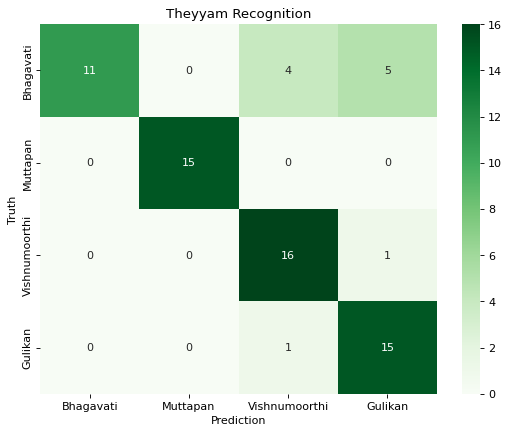

In [44]:
#Plot the confusion matrix to understand the classification in detail

pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Theyyam Recognition')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [49]:
#Printing some other classification metrics

print("Balanced Accuracy Score: {} %".format(round(BAS(test_ls, pred_ls) * 100, 2)))
mcc_value = round(matthews_corrcoef(test_ls, pred_ls) * 100, 2)
print("Matthew's Correlation Coefficient: {} %".format(mcc_value))

Balanced Accuracy Score: 85.72 %
Matthew's Correlation Coefficient: 79.94 %


In [50]:
#Saving the model for future use
model.save('theyyam.h5')

c:\Users\ar646\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pretrained_model = tf.keras.models.load_model("theyyam.h5")

#Check its architecture
plot_model(pretrained_model, to_file="dataset\dataset\Test\Bhagavati\1699886336689.jpg" , show_shapes=True, show_layer_names=True)

In [7]:
!pip install numpy tensorflow matplotlib imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 3.3 MB/s eta 0:00:03
   - -------------------------------------- 0.3/9.3 MB 3.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.3 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/9.3 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.3 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.3 MB 3.5 MB/s eta 0:00:03
   ------ ------------------

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the saved model
model = tf.keras.models.load_model('theyyam.h5')

# Load and preprocess the test data
def load_and_preprocess_image(image_path):
    image = load_img(image_path, target_size=(176, 176))
    image_array = img_to_array(image)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Load a single image for testing
image_path = 'dataset\\dataset\\Test\\Muttapan\\1699886244999.jpg'
test_image = load_and_preprocess_image(image_path)
test_image = np.expand_dims(test_image, axis=0)

# Make predictions
y_pred = model.predict(test_image)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(y_pred)

# Define class labels
class_labels = ["Bhagavathi", "Gulikan", "Muthappan", "Vishnumoorthi"]

# Print the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print('Predicted class label:', predicted_class_label)


ValueError: Unknown metric function: 'Addons>F1Score'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.